In [1]:
import argparse
import csv
from datetime import datetime
from pathlib import Path
import numpy as np
import pandas as pd
import PIL as pil
import cv2
import pickle
import time
import mediapipe as mp

In [2]:
# build and save model

import sys
sys.path.append('ml/scripts')

fist = pd.read_csv("ml/data/raw/fist_20251201_164527.csv")
open_hand = pd.read_csv("ml/data/raw/open_hand_20251201_164614.csv")
pinch = pd.read_csv("ml/data/raw/pinch_20251201_164652.csv")
point = pd.read_csv("ml/data/raw/point_20251201_164852.csv")
thumbs_up = pd.read_csv("ml/data/raw/thumbs_up_20251201_164813.csv")
d = pd.concat([fist, open_hand, pinch, point, thumbs_up])
d.to_csv("ml/data/processed/gestures_merged.csv", index=False)

from ml.scripts.train_classifier import GestureClassifierTrainer

trainer = GestureClassifierTrainer("ml/data/processed/gestures_merged.csv")
trainer.load_data()


Loading data from ml/data/processed/gestures_merged.csv...
✓ Loaded 2500 samples
  Train: 2000 samples
  Test:  500 samples
  Features: 31
  Classes: 5

Class distribution (train):
  fist           :  400 samples
  open_hand      :  400 samples
  pinch          :  400 samples
  point          :  400 samples
  thumbs_up      :  400 samples



Training k-NN (k=5)...
✓ Training complete

Training Random Forest (trees=100, depth=10)...
✓ Training complete
Model Evaluation

Evaluating model: knn

Test Accuracy: 95.00%
Cross-val Accuracy: 94.70% ± 1.04%

Classification Report:
              precision    recall  f1-score   support

   open_hand       0.96      0.98      0.97       100
        fist       0.95      0.97      0.96       100
       pinch       1.00      0.98      0.99       100
       point       0.94      0.87      0.90       100
   thumbs_up       0.90      0.95      0.93       100

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500


✓ Confusion matrix saved: ml/models/confusion_matrix_knn_20251201_174609.png


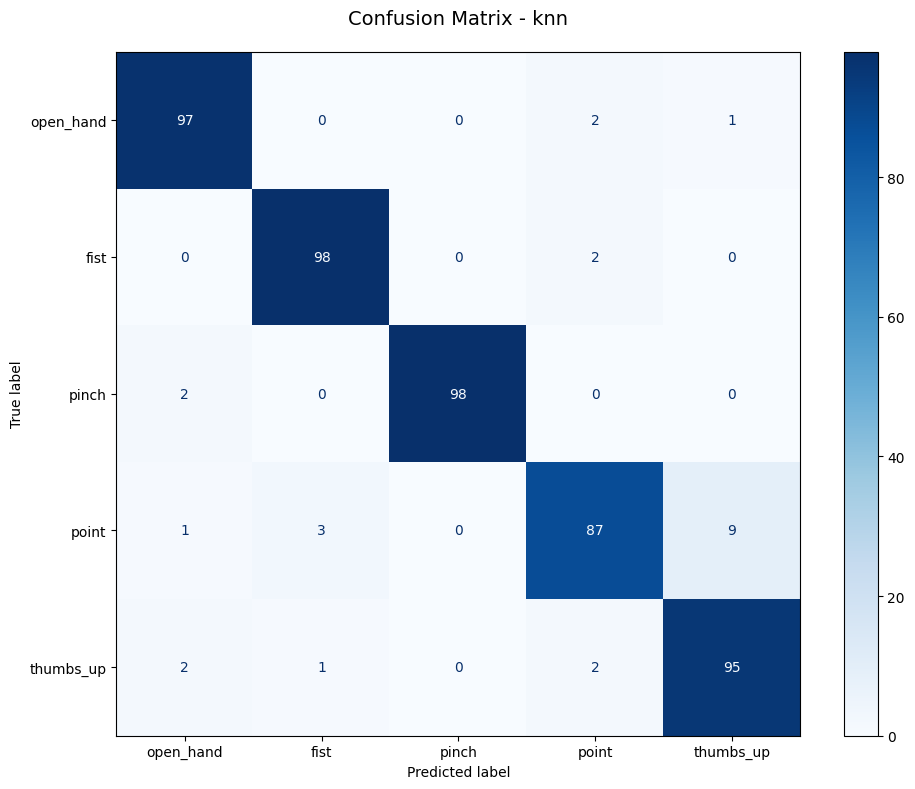


✓ Confusion matrix saved: ml/models/confusion_matrix_rf_20251201_174610.png


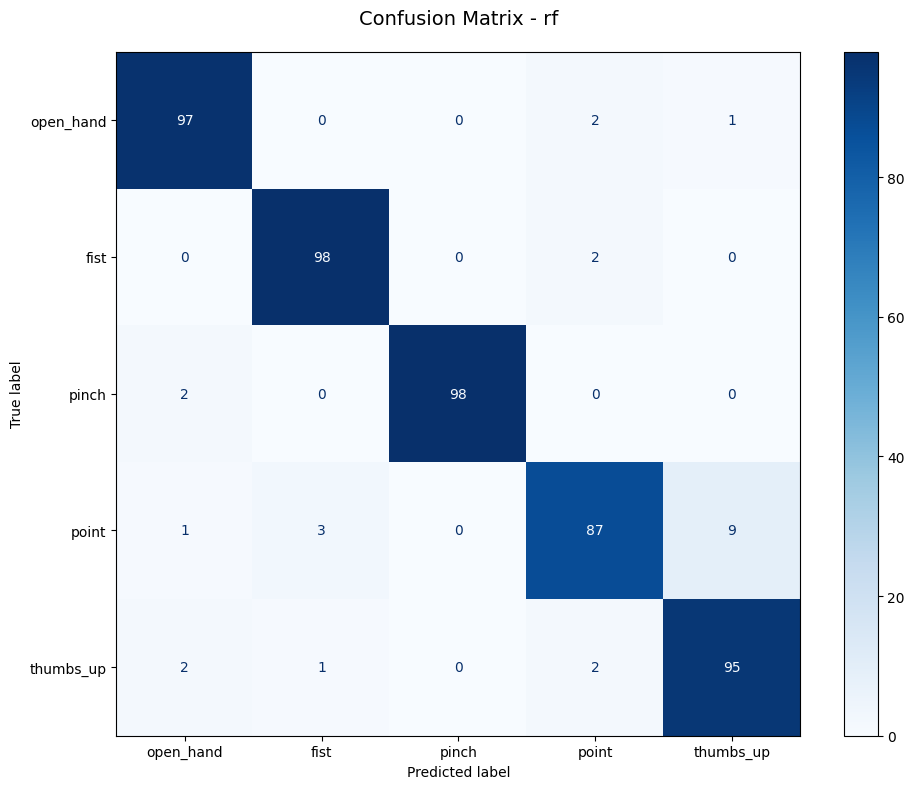


Evaluating model: rf

Test Accuracy: 97.00%
Cross-val Accuracy: 96.45% ± 1.09%

Classification Report:
              precision    recall  f1-score   support

   open_hand       0.98      1.00      0.99       100
        fist       0.98      0.98      0.98       100
       pinch       1.00      0.97      0.98       100
       point       0.93      0.96      0.95       100
   thumbs_up       0.96      0.94      0.95       100

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500


✓ Confusion matrix saved: ml/models/confusion_matrix_knn_20251201_174612.png


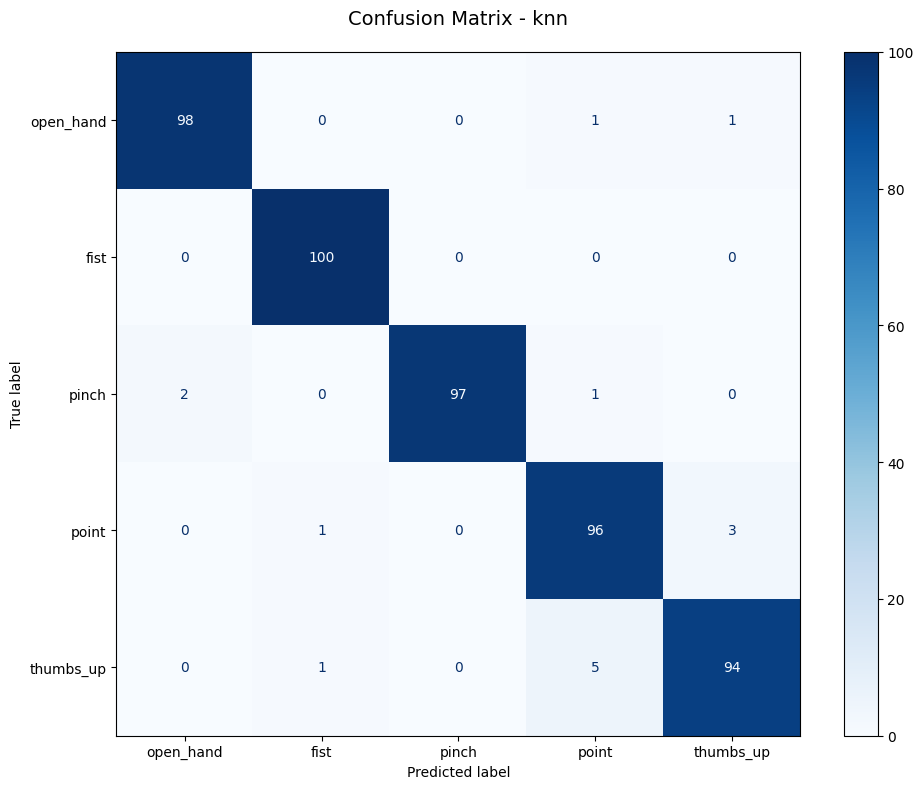


✓ Confusion matrix saved: ml/models/confusion_matrix_rf_20251201_174612.png


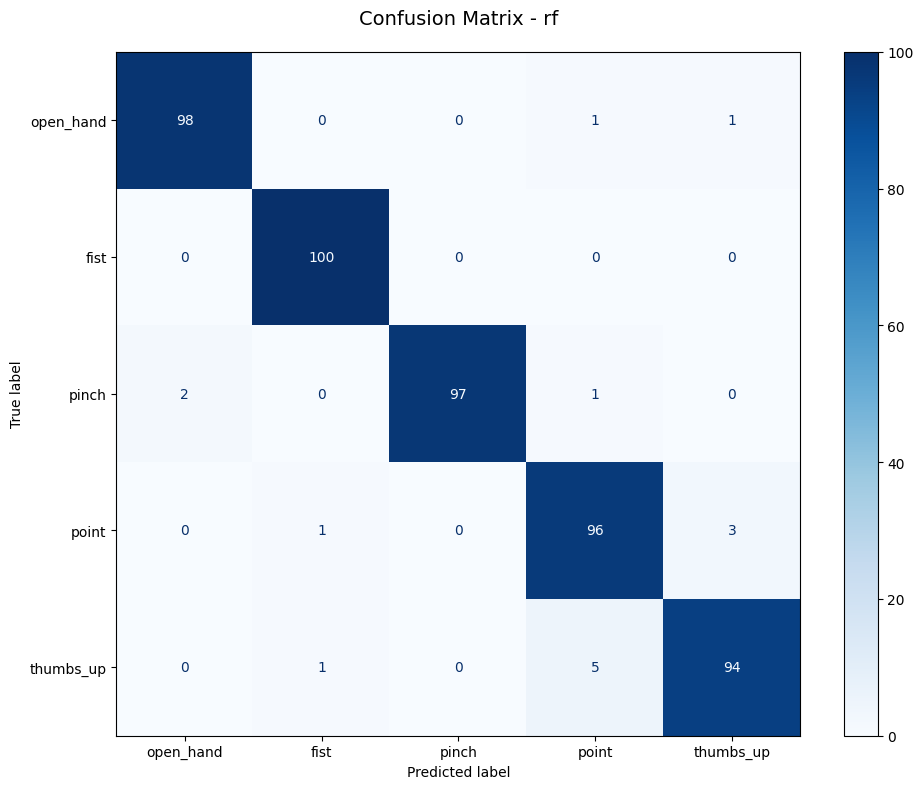

{'knn': 0.95, 'rf': 0.97}

In [3]:
trainer.train()
trainer.evaluate("ml/models")

In [4]:
trainer.save_pickle("ml/models")

✓ Pickle saved: ml/models/gesture_classifier_knn.pkl
✓ Pickle saved: ml/models/gesture_classifier_rf.pkl


In [5]:
import sys
sys.path.append('ml/scripts')

from ml.scripts.test_model import GestureClassifierTester

tester = GestureClassifierTester("ml/models/gesture_classifier_knn.pkl")
tester.test_live_webcam()

✓ Loaded model from ml/models/gesture_classifier_knn.pkl
  Type: KNeighborsClassifier

Starting live webcam test...
Press 'q' to quit


I0000 00:00:1764640012.562908 21264775 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1 Pro
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1764640012.586817 21266385 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1764640012.595978 21266385 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
2025-12-01 17:46:52.952 python[50372:21264775] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.



✓ Live test complete
